In [4]:
!pip install yfinance

In [5]:
import yfinance as yf
import pandas as pd

In [6]:
ticker = 'AAPL'
ticker_data = yf.Ticker(ticker)
ticker_data

yfinance.Ticker object <AAPL>

In [8]:
data = yf.download(ticker, start='2013-01-01',end='2023-01-01')
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2013-01-02 00:00:00+00:00,16.687344,19.608213,19.821428,19.343929,19.779285,560518000
2013-01-03 00:00:00+00:00,16.476711,19.360714,19.631071,19.321428,19.567142,352965200
2013-01-04 00:00:00+00:00,16.017754,18.821428,19.236786,18.779642,19.177500,594333600
2013-01-07 00:00:00+00:00,15.923536,18.710714,18.903570,18.400000,18.642857,484156400
2013-01-08 00:00:00+00:00,15.966389,18.761070,18.996071,18.616072,18.900356,458707200
...,...,...,...,...,...,...
2022-12-23 00:00:00+00:00,130.487778,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27 00:00:00+00:00,128.676834,130.029999,131.410004,128.720001,131.380005,69007800


In [10]:
data = data[['Adj Close']]
data.reset_index(inplace = True)
data.columns = ['Date','Adj_Close']
data

,Date,Adj_Close
0,2013-01-02 00:00:00+00:00,16.687344
1,2013-01-03 00:00:00+00:00,16.476711
2,2013-01-04 00:00:00+00:00,16.017754
3,2013-01-07 00:00:00+00:00,15.923536
4,2013-01-08 00:00:00+00:00,15.966389
...,...,...
2513,2022-12-23 00:00:00+00:00,130.487778
2514,2022-12-27 00:00:00+00:00,128.676834
2515,2022-12-28 00:00:00+00:00,124.728371
2516,2022-12-29 00:00:00+00:00,128.261215


In [11]:
daily_returns = [None]
for i in range(1, len(data)):
  per_change = (data['Adj_Close'][i] - data['Adj_Close'][i-1])/data['Adj_Close'][i-1]
  daily_returns.append(per_change)
daily_returns

[None,
 -0.012622280052495298,
 -0.027854932001256695,
 -0.005882054547818768,
 0.002691135996695941,
 -0.015628684601790042,
 0.01239606010005754,
 -0.0061316394128049035,
 -0.03565282604878068,
 -0.031549428313177745,
 0.041508820406405855,
 -0.00673806085253665,
 -0.00533121541162557,
 0.009540124278591836,
 0.01830543646959425,
 -0.12355780834848934,
 -0.02357405423446346,
 0.022619946382349317,
 0.01876247830780701,
 -0.003142133044946155,
 -0.0029333479309312915,
 -0.004105391249358931,
 -0.02491075707220114,
 0.0350876769849874,
 -0.0010702688336852123,
 0.029733993667966425,
 0.014437639545438313,
 0.010421545198329532,
 -0.025065926959604166,
 -0.001902502227786373,
 -0.0008991588746466589,
 -0.013780656897144566,
 -0.0003697357148905127,
 -0.024217762789676637,
 -0.006216137493530431,
 0.010648799964417281,
 -0.017768035969526433,
 0.01393405873738215,
 -0.00979992162508442,
 -0.007130569555822073,
 -0.024762086761439962,
 -0.024206265236258018,
 0.026401733642572867,
 -0.012

In [12]:
data['Daily_Returns'] = daily_returns
data

<ipython-input-12-b28b910471df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Daily_Returns'] = daily_returns


,Date,Adj_Close,Daily_Returns
0,2013-01-02 00:00:00+00:00,16.687344,NaN
1,2013-01-03 00:00:00+00:00,16.476711,-0.012622
2,2013-01-04 00:00:00+00:00,16.017754,-0.027855
3,2013-01-07 00:00:00+00:00,15.923536,-0.005882
4,2013-01-08 00:00:00+00:00,15.966389,0.002691
...,...,...,...
2513,2022-12-23 00:00:00+00:00,130.487778,-0.002798
2514,2022-12-27 00:00:00+00:00,128.676834,-0.013878
2515,2022-12-28 00:00:00+00:00,124.728371,-0.030685
2516,2022-12-29 00:00:00+00:00,128.261215,0.028324


In [13]:
data.dropna(inplace=True)
data.head()

<ipython-input-13-305667f40e0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,Date,Adj_Close,Daily_Returns
1,2013-01-03 00:00:00+00:00,16.476711,-0.012622
2,2013-01-04 00:00:00+00:00,16.017754,-0.027855
3,2013-01-07 00:00:00+00:00,15.923536,-0.005882
4,2013-01-08 00:00:00+00:00,15.966389,0.002691
5,2013-01-09 00:00:00+00:00,15.716855,-0.015629


In [14]:
!pip install hmmlearn numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 4.0 MB/s eta 0:00:00


In [15]:
from hmmlearn.hmm import GaussianHMM
import numpy as np

returns = data['Daily_Returns'].values
returns = returns.reshape(-1, 1)
returns

array([[-0.01262228],
       [-0.02785493],
       [-0.00588205],
       ...,
       [-0.03068511],
       [ 0.02832431],
       [ 0.00246879]])

In [16]:
model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000, random_state = 42)
model.fit(returns)

GaussianHMM(covariance_type='full', n_components=2, n_iter=1000,
            random_state=42)

In [17]:
hidden_states = model.predict(returns)
data['Hidden_State'] = hidden_states
data.head()

<ipython-input-17-b41bcee4ea3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hidden_State'] = hidden_states


,Date,Adj_Close,Daily_Returns,Hidden_State
1,2013-01-03 00:00:00+00:00,16.476711,-0.012622,1
2,2013-01-04 00:00:00+00:00,16.017754,-0.027855,1
3,2013-01-07 00:00:00+00:00,15.923536,-0.005882,1
4,2013-01-08 00:00:00+00:00,15.966389,0.002691,1
5,2013-01-09 00:00:00+00:00,15.716855,-0.015629,1


In [18]:
for state in range(model.n_components):
  print(f"Hidden State {state}")
  print(f"Mean: {model.means_[state][0]}")
  print(f"Variance: {np.diag(model.covars_[state])[0]}")

Hidden State 0
Mean: 0.0014652374566105125
Variance: 0.00014825038188238682
Hidden State 1
Mean: -0.00042840863174226
Variance: 0.0009046679023110685


In [19]:
!pip install matplotlib

In [20]:
import matplotlib.pyplot as plt

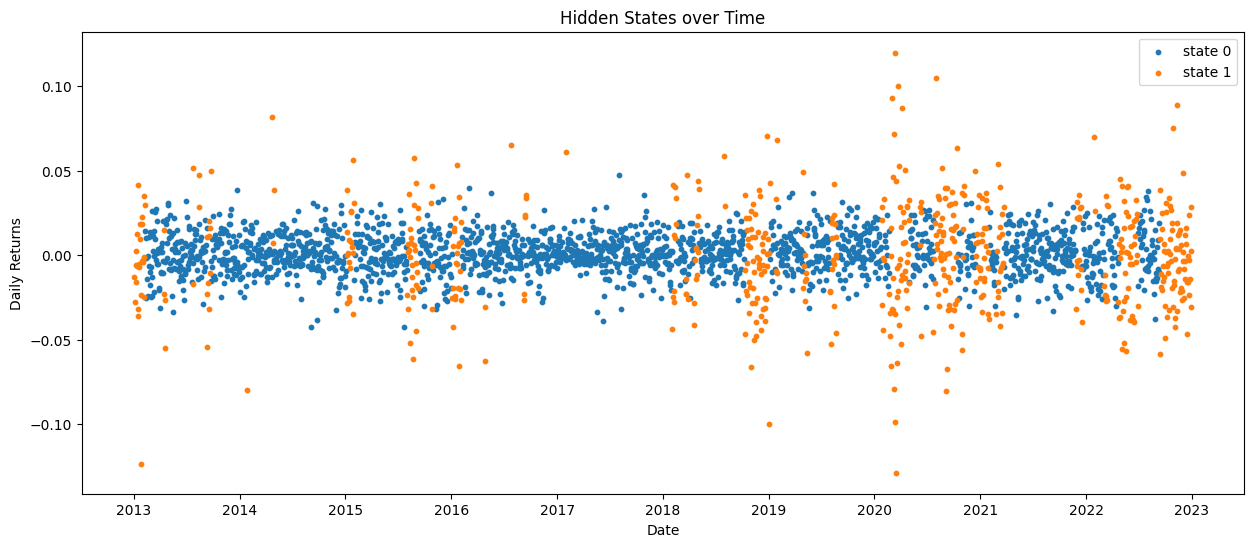

In [21]:
plt.figure(figsize=(15,6))
for state in range(model.n_components):
  mask = (data['Hidden_State'] == state)
  plt.scatter(data['Date'][mask], data['Daily_Returns'][mask], label=f"state {state}", s=10)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.title("Hidden States over Time")
plt.show()

In [22]:
print("Transition Matrix:")
print(model.transmat_)


Transition Matrix:
[[0.96372355 0.03627645]
 [0.10579222 0.89420778]]


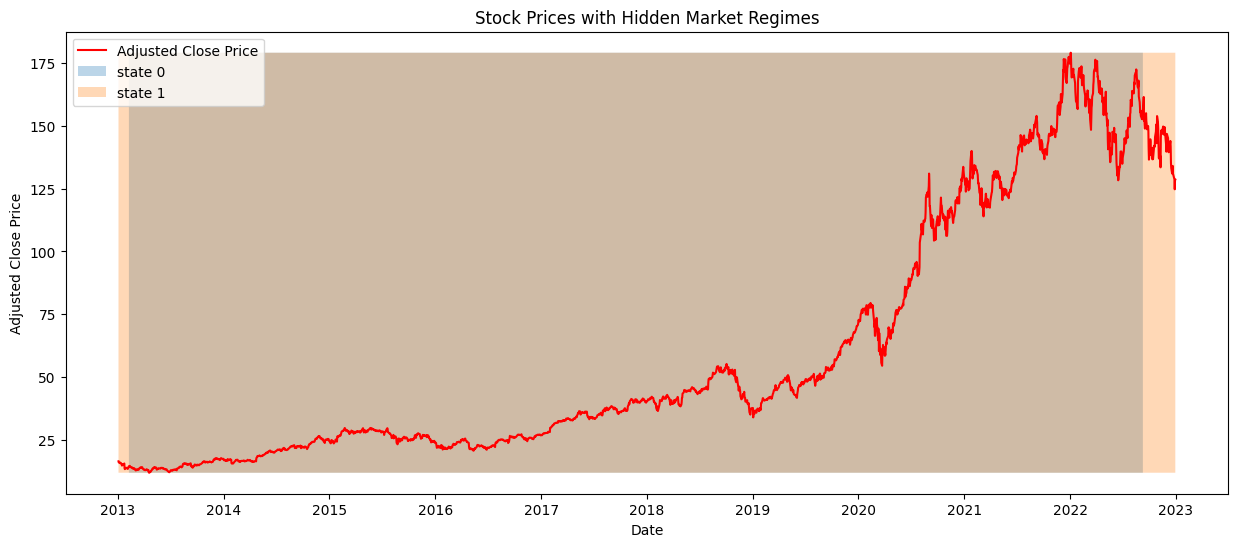

In [23]:
plt.figure(figsize=(15,6))
plt.plot(data['Date'], data['Adj_Close'], label='Adjusted Close Price', color='red')

for state in range(model.n_components):
  mask = (data['Hidden_State'] == state)
  plt.fill_between(data['Date'][mask], data['Adj_Close'].min(), data['Adj_Close'].max(), alpha=0.3, label=f"state {state}")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.title("Stock Prices with Hidden Market Regimes")
plt.show()

In [24]:
curr_state = hidden_states[-1]
next_state_probability = model.transmat_[curr_state]
next_state = np.argmax(next_state_probability)

print(f"Current State: {curr_state}")
print(f"Transition probabilities: {next_state_probability}")
print(f"Next State: {next_state}")

Current State: 1
Transition probabilities: [0.10579222 0.89420778]
Next State: 1


# Predicting Bull or Bear in 2 state model

In [25]:
state_labels = []
for state in range(model.n_components):
  state_mean = model.means_[state][0]
  state_variance = np.diag(model.covars_[state][0])
  if state_mean > 0 and state_variance<0.001:
    state_label = 'Bull'
  elif state_mean<0:
    state_label = 'Bear'
  else:
    state_label = 'Neutral'
  state_labels.append(state_label)

data['Market_type'] = data['Hidden_State'].apply(lambda x: state_labels[x])
print(data[['Date', 'Adj_Close', 'Daily_Returns', 'Hidden_State', 'Market_type']].head())


                       Date  Adj_Close  Daily_Returns  Hidden_State  \
1 2013-01-03 00:00:00+00:00  16.476711      -0.012622             1   
2 2013-01-04 00:00:00+00:00  16.017754      -0.027855             1   
3 2013-01-07 00:00:00+00:00  15.923536      -0.005882             1   
4 2013-01-08 00:00:00+00:00  15.966389       0.002691             1   
5 2013-01-09 00:00:00+00:00  15.716855      -0.015629             1   

  Market_type  
1        Bear  
2        Bear  
3        Bear  
4        Bear  
5        Bear  


<ipython-input-25-3271739a3fe9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Market_type'] = data['Hidden_State'].apply(lambda x: state_labels[x])


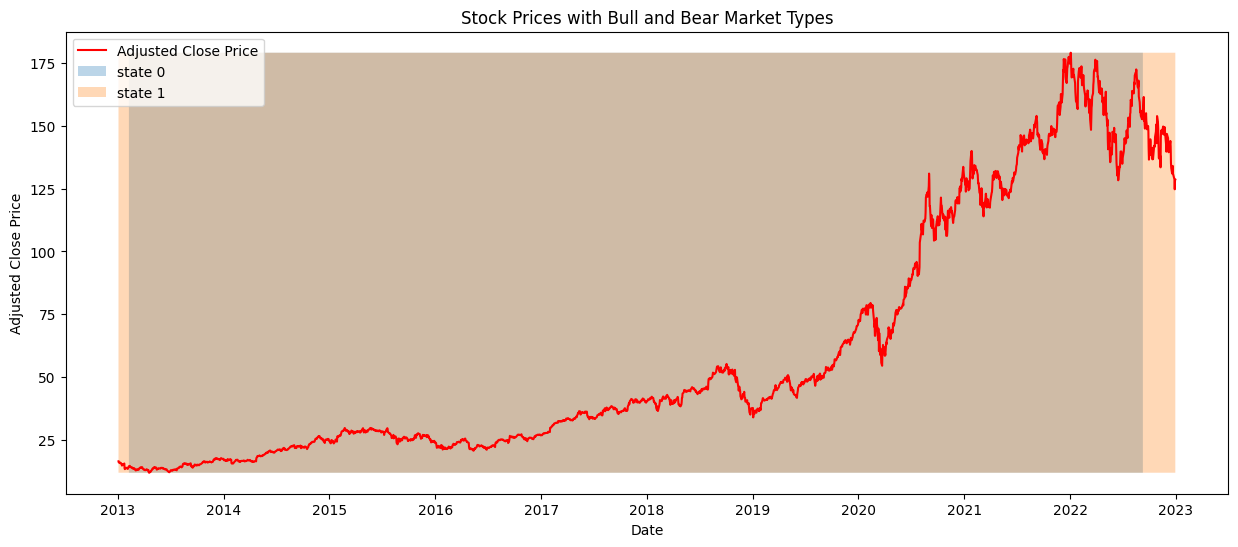

In [26]:
plt.figure(figsize=(15,6))
plt.plot(data['Date'], data['Adj_Close'], label='Adjusted Close Price', color='red')
for state in range(model.n_components):
  mask = (data['Hidden_State'] == state)
  plt.fill_between(data['Date'][mask], data['Adj_Close'].min(), data['Adj_Close'].max(), alpha=0.3, label=f"state {state}")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.title("Stock Prices with Bull and Bear Market Types")
plt.show()